<a href="https://colab.research.google.com/github/sinthumerlin96/python/blob/main/PatientCare_Classification_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [5]:
patient_df = pd.read_csv('PatientCare.csv')

In [6]:
patient_df.head()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,33.8,11.1,4.18,4.6,150,26.6,32.8,80.9,33,F,1
1,44.6,14.0,6.86,6.3,232,20.4,31.4,65.0,36,M,0
2,42.9,14.0,4.57,6.2,336,30.6,32.6,93.9,70,F,0
3,41.9,14.4,4.67,3.5,276,30.8,34.4,89.7,18,F,0
4,40.6,13.3,4.85,14.9,711,27.4,32.8,83.7,36,M,0


In [7]:
gender = {'M' : 1, 'F':0}
patient_df['SEX'] = patient_df['SEX'].map(gender)


In [8]:
patient_df.head()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,33.8,11.1,4.18,4.6,150,26.6,32.8,80.9,33,0,1
1,44.6,14.0,6.86,6.3,232,20.4,31.4,65.0,36,1,0
2,42.9,14.0,4.57,6.2,336,30.6,32.6,93.9,70,0,0
3,41.9,14.4,4.67,3.5,276,30.8,34.4,89.7,18,0,0
4,40.6,13.3,4.85,14.9,711,27.4,32.8,83.7,36,1,0


In [9]:
patient_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3309 entries, 0 to 3308
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HAEMATOCRIT   3309 non-null   float64
 1   HAEMOGLOBINS  3309 non-null   float64
 2   ERYTHROCYTE   3309 non-null   float64
 3   LEUCOCYTE     3309 non-null   float64
 4   THROMBOCYTE   3309 non-null   int64  
 5   MCH           3309 non-null   float64
 6   MCHC          3309 non-null   float64
 7   MCV           3309 non-null   float64
 8   AGE           3309 non-null   int64  
 9   SEX           3309 non-null   int64  
 10  SOURCE        3309 non-null   int64  
dtypes: float64(7), int64(4)
memory usage: 284.5 KB


In [10]:
patient_df.describe()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
count,3309.000000,3309.000000,3309.000000,3309.000000,3309.000000,3309.000000,3309.000000,3309.000000,3309.000000,3309.000000,3309.000000
mean,38.226111,12.749350,4.544802,8.715533,258.893019,28.230039,33.336476,84.611333,46.644303,0.526745,0.398005
std,5.971943,2.084325,0.784510,4.991299,112.676139,2.696520,1.247055,6.916079,21.874106,0.499360,0.489561
min,13.700000,3.800000,1.480000,1.100000,10.000000,14.900000,26.000000,54.000000,1.000000,0.000000,0.000000
25%,34.300000,11.400000,4.040000,5.700000,191.000000,27.200000,32.700000,81.500000,29.000000,0.000000,0.000000
50%,38.700000,12.900000,4.580000,7.600000,257.000000,28.700000,33.400000,85.300000,48.000000,1.000000,0.000000
75%,42.500000,14.200000,5.060000,10.300000,322.000000,29.800000,34.100000,88.800000,64.000000,1.000000,1.000000
max,69.000000,18.900000,7.860000,76.600000,1121.000000,40.800000,38.400000,115.600000,99.000000,1.000000,1.000000


<Axes: xlabel='SEX', ylabel='count'>

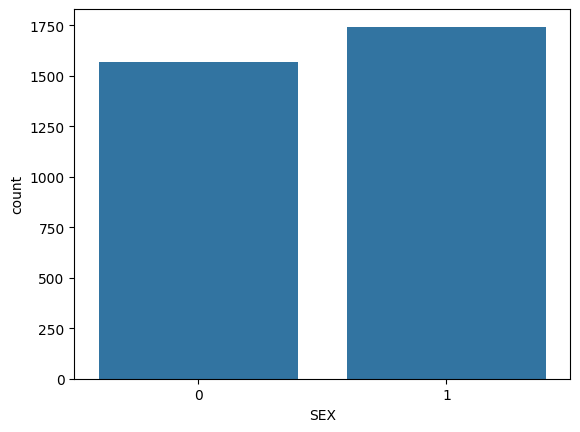

In [11]:
sns.countplot(x='SEX', data=patient_df)

<Axes: xlabel='SOURCE', ylabel='count'>

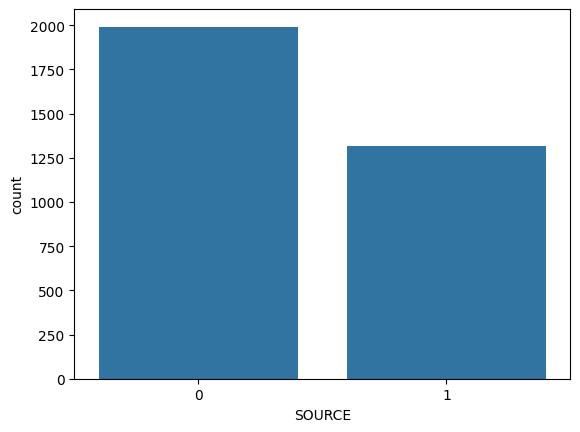

In [12]:
sns.countplot(x ='SOURCE', data = patient_df)

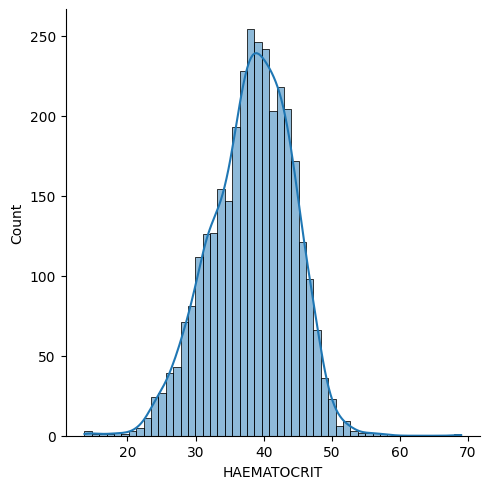

In [13]:
sns.displot(patient_df['HAEMATOCRIT'],kde = True)

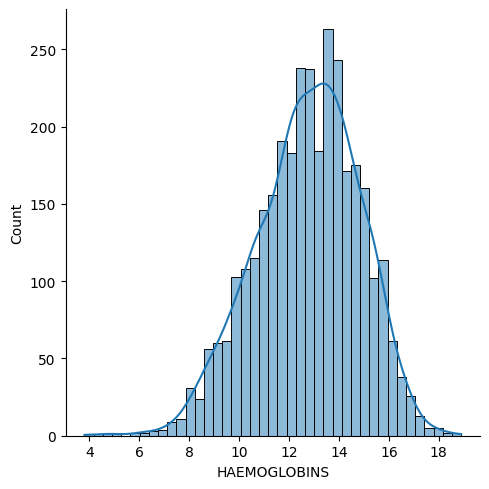

In [14]:
sns.displot(patient_df['HAEMOGLOBINS'],kde = True)

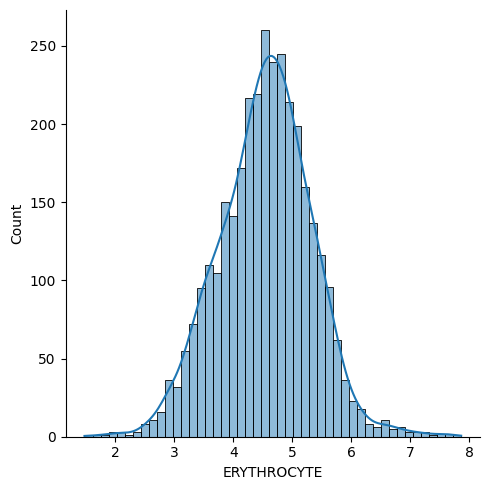

In [15]:
sns.displot(patient_df['ERYTHROCYTE'],kde = True)

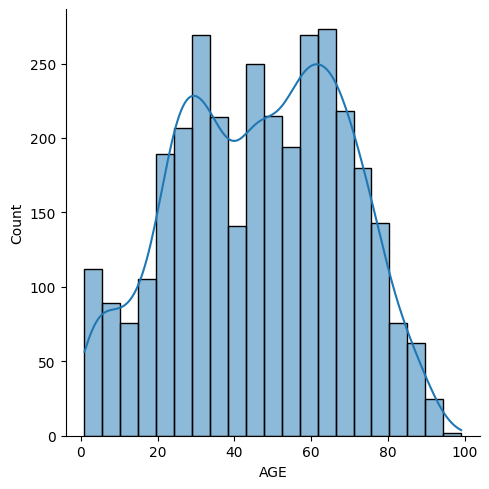

In [16]:
sns.displot(patient_df['AGE'],kde = True)

In [17]:
df_x = patient_df.iloc[:,0:10]
df_y = patient_df.iloc[:,10]

In [18]:
df_x

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX
0,33.8,11.1,4.18,4.6,150,26.6,32.8,80.9,33,0
1,44.6,14.0,6.86,6.3,232,20.4,31.4,65.0,36,1
2,42.9,14.0,4.57,6.2,336,30.6,32.6,93.9,70,0
3,41.9,14.4,4.67,3.5,276,30.8,34.4,89.7,18,0
4,40.6,13.3,4.85,14.9,711,27.4,32.8,83.7,36,1
...,...,...,...,...,...,...,...,...,...,...
3304,39.0,13.2,4.45,4.0,50,29.7,33.8,87.6,45,1
3305,25.4,8.2,3.27,5.4,90,25.1,32.3,77.7,1,0
3306,38.2,12.4,4.40,8.4,328,28.2,32.5,86.8,64,1
3307,43.4,15.2,5.29,10.1,326,28.7,35.0,82.0,33,1


In [19]:
df_y

,SOURCE
0,1
1,0
2,0
3,0
4,0
...,...
3304,1
3305,1
3306,0
3307,0


In [21]:
df_x_train, df_x_test, y_train, y_test=train_test_split(df_x, df_y, test_size=0.20, random_state=1)

dt_model = DecisionTreeClassifier(random_state = 1)

dt_model.fit(df_x_train,y_train)


DecisionTreeClassifier(random_state=1)

In [22]:

dt_predictions = dt_model.predict(df_x_test)

In [23]:

dt_accuracy = accuracy_score(y_test,dt_predictions)

In [25]:
dt_accuracy

0.648036253776435

In [30]:

#confusion matrix for Decision Tree
print(confusion_matrix(y_test,dt_predictions))

[[280 139]
 [ 94 149]]


In [35]:
lr_model = LogisticRegression(random_state = 1)

In [36]:
lr_model.fit(df_x_train,y_train)

LogisticRegression(random_state=1)

In [37]:

lr_predictions = lr_model.predict(df_x_test)

In [38]:
lr_accuracy = accuracy_score(y_test,lr_predictions)

In [39]:

lr_accuracy

0.7175226586102719

In [31]:

#confusion matrix for Decision Tree
print(confusion_matrix(y_test,dt_predictions))

[[280 139]
 [ 94 149]]


In [40]:
#classification report for Decision Tree
print(classification_report(y_test,dt_predictions))

              precision    recall  f1-score   support

           0       0.75      0.67      0.71       419
           1       0.52      0.61      0.56       243

    accuracy                           0.65       662
   macro avg       0.63      0.64      0.63       662
weighted avg       0.66      0.65      0.65       662



In [32]:
#classification report for Logisitc Regression
print(classification_report(y_test,dt_predictions))

              precision    recall  f1-score   support

           0       0.75      0.67      0.71       419
           1       0.52      0.61      0.56       243

    accuracy                           0.65       662
   macro avg       0.63      0.64      0.63       662
weighted avg       0.66      0.65      0.65       662

